In [1]:
import pandas as pd
import numpy as np
import os
from google.colab import drive

In [2]:
print("Mounting Google Drive...")
drive.mount('/content/drive')
print("Google Drive mounted successfully!")

Mounting Google Drive...
Mounted at /content/drive
Google Drive mounted successfully!


In [3]:
data_folder_path = input("/content/drive/MyDrive/Fake_New_Classification/")

/content/drive/MyDrive/Fake_New_Classification/


In [8]:
import os
import pandas as pd

# Get the data folder path from the user
data_folder_path = input("Please enter the path to your data folder in Google Drive (e.g., /content/drive/MyDrive/Fake_New_Classification/): ")

# 3. Read the datasets and preprocess them
# ==============================================================================
fake_news_path = os.path.join(data_folder_path, 'fake_news.csv')
real_news_path = os.path.join(data_folder_path, 'real_news.csv')

fake_df = None
real_df = None

try:
    fake_df = pd.read_csv(fake_news_path)
    print(f"\nSuccessfully loaded 'fake_news.csv' from: {fake_news_path}")
    print("Columns in fake_df:", fake_df.columns.tolist())
except FileNotFoundError:
    print(f"\nError: 'fake_news.csv' not found at '{fake_news_path}'. Please check your folder path and file name.")
    # Removed exit()

try:
    real_df = pd.read_csv(real_news_path)
    print(f"Successfully loaded 'real_news.csv' from: {real_news_path}")
    print("Columns in real_df:", real_df.columns.tolist())
except FileNotFoundError:
    print(f"Error: 'real_news.csv' not found at '{real_news_path}'. Please check your folder path and file name.")
    # Removed exit()

# Add a check to see if dataframes were loaded before proceeding
if fake_df is not None and real_df is not None:
    # The project proposal specifies labels as 0 for Real and 1 for Fake.
    # The fake news dataframe already has 'news', 'url', and 'label' columns,
    # but the real news dataframe has extra columns.
    # We need to drop the 'category' column from the real news DataFrame
    # and select only the relevant columns for consistency.
    print("\nBefore preprocessing, columns in real_df:", real_df.columns.tolist())
    if 'category' in real_df.columns:
        real_df = real_df.drop(columns=['category'])
        print("Removed 'category' column from real_df.")
    print("After preprocessing, columns in real_df:", real_df.columns.tolist())

    # Map the labels to numerical values as per your project plan (Fake=1, Real=0).
    label_mapping = {'fake': 1, 'real': 0}
    # Convert labels to lowercase to handle potential inconsistencies
    fake_df['label'] = fake_df['label'].astype(str).str.lower().map(label_mapping)
    real_df['label'] = real_df['label'].astype(str).str.lower().map(label_mapping)

    print("\nReal News DataFrame after preprocessing:\n", real_df.head())
    print("\nFake News DataFrame after preprocessing:\n", fake_df.head())
else:
    print("\nSkipping data preprocessing and merging due to file not found errors.")

# Add an if __name__ == "__main__": block for standard practice
if __name__ == "__main__":
    pass # The rest of the script logic would go here if not in a notebook

Please enter the path to your data folder in Google Drive (e.g., /content/drive/MyDrive/Fake_New_Classification/): /content/drive/MyDrive/Fake_New_Classification/

Successfully loaded 'fake_news.csv' from: /content/drive/MyDrive/Fake_New_Classification/fake_news.csv
Columns in fake_df: ['id', 'news', 'url', 'label']
Successfully loaded 'real_news.csv' from: /content/drive/MyDrive/Fake_New_Classification/real_news.csv
Columns in real_df: ['id', 'news', 'url', 'label', 'category']

Before preprocessing, columns in real_df: ['id', 'news', 'url', 'label', 'category']
Removed 'category' column from real_df.
After preprocessing, columns in real_df: ['id', 'news', 'url', 'label']

Real News DataFrame after preprocessing:
    id                                               news  \
0   1  ယူကရိန်းစစ်ပွဲတွင် ရုရှားဘက်မှ ကူညီတိုက်ခိုက်ပ...   
1   2  ထိုင်းတော်ဝင်ရေတပ်က နယ်စပ်ဒေသတွင် ကမ္ဘောဒီးယား...   
2   3  အမေရိကန်-တောင်ကိုရီးယား ပူးတွဲစစ်ရေးလေ့ကျင့်မှ...   
3   4  အိန္ဒိယကမ်းလွန်တွင် ဓာတုပစ္စ

In [9]:
# 4. Merge and shuffle the datasets
# ==============================================================================
combined_df = pd.concat([fake_df, real_df], ignore_index=True)
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [10]:
# 5. Drop the old 'id' column and create a new, ordered one
# ==============================================================================
# Drop the old, shuffled 'id' column.
combined_df = combined_df.drop(columns=['id'])
# Create a new 'id' column with a perfect sequence from 1 to the end.
combined_df.insert(0, 'id', range(1, 1 + len(combined_df)))

print("\nCombined DataFrame shape:", combined_df.shape)
print("First 5 rows of the combined and shuffled DataFrame:")
print(combined_df.head())


Combined DataFrame shape: (1096, 4)
First 5 rows of the combined and shuffled DataFrame:
   id                                               news  \
0   1  ကယ်ဆယ်ရေး ဗီဒီယိုဟောင်းတစ်ခုကို လူအသေအပျောက်မျ...   
1   2  ရုရှား၏ Su-34 ဗုံးကြဲတိုက်လေယာဉ်သုံးစင်းကို ပစ...   
2   3  Pfizer က ကိုဗစ်-၁၉ ကာကွယ်ဆေးရဲ့ ဘေးထွက်ဆိုးကျိ...   
3   4                 ချီလီနှင့် အာဂျင်တီးနားတို့တွင်...   
4   5  ဖယ်ခုံမြို့အတွင်း စစ်ကောင်စီတပ်က မြေမြုပ်မိုင်...   

                                                 url  label  
0  https://factcheckmyanmar.afp.com/doc.afp.com.4...      1  
1             https://news-eleven.com/article/285974      0  
2  https://factcheckmyanmar.afp.com/doc.afp.com.3...      1  
3             https://news-eleven.com/article/302460      0  
4  https://myanmarfactcheckingnetwork.org/2024/11...      1  


In [11]:
# 6. Extract the Source Domain from the URL
# ==============================================================================
import re
from urllib.parse import urlparse

# Define a function to extract the root domain
def get_domain(url):
    """
    This function takes a URL and returns its root domain.
    For example, it will return 'factcheckmyanmar.afp.com' from a full URL.
    """
    try:
        # Use urlparse to break down the URL
        parsed_url = urlparse(url)
        # The 'netloc' part of the URL contains the domain
        domain = parsed_url.netloc
        # Clean up any 'www.' prefix
        domain = re.sub(r'^www\.', '', domain)
        return domain
    except:
        # Return an empty string if the URL is invalid
        return ''

# Apply the function to the 'url' column to create the new 'source_domain' column.
combined_df['source_domain'] = combined_df['url'].apply(get_domain)

# Now you can check the first few rows to see the new column.
print("\nDataFrame after adding 'source_domain' column:")
print(combined_df.head())


DataFrame after adding 'source_domain' column:
   id                                               news  \
0   1  ကယ်ဆယ်ရေး ဗီဒီယိုဟောင်းတစ်ခုကို လူအသေအပျောက်မျ...   
1   2  ရုရှား၏ Su-34 ဗုံးကြဲတိုက်လေယာဉ်သုံးစင်းကို ပစ...   
2   3  Pfizer က ကိုဗစ်-၁၉ ကာကွယ်ဆေးရဲ့ ဘေးထွက်ဆိုးကျိ...   
3   4                 ချီလီနှင့် အာဂျင်တီးနားတို့တွင်...   
4   5  ဖယ်ခုံမြို့အတွင်း စစ်ကောင်စီတပ်က မြေမြုပ်မိုင်...   

                                                 url  label  \
0  https://factcheckmyanmar.afp.com/doc.afp.com.4...      1   
1             https://news-eleven.com/article/285974      0   
2  https://factcheckmyanmar.afp.com/doc.afp.com.3...      1   
3             https://news-eleven.com/article/302460      0   
4  https://myanmarfactcheckingnetwork.org/2024/11...      1   

                    source_domain  
0        factcheckmyanmar.afp.com  
1                 news-eleven.com  
2        factcheckmyanmar.afp.com  
3                 news-eleven.com  
4  myanmarfactcheckingnetwork.or

In [12]:
# 7. Save merged dataset to Google Drive
output_path = os.path.join(data_folder_path, "fake_real_news.csv")
combined_df.to_csv(output_path, index=False, encoding="utf-8-sig")

print(f"\n✅ Merged dataset saved at: {output_path}")


✅ Merged dataset saved at: /content/drive/MyDrive/Fake_New_Classification/fake_real_news.csv


In [13]:
# Installs the Hugging Face `transformers` library.
# This library provides access to pre-trained models like XLM-RoBERTa.
!pip install transformers

# Installs PyTorch, the deep learning framework.
# You can also use TensorFlow/Keras, but PyTorch is a popular choice for
# research and is well-supported by the `transformers` library.
!pip install torch

# Installs scikit-learn, a library for machine learning in Python.
# We will use this for splitting the data and for evaluation metrics.
!pip install scikit-learn

print("✅ Required libraries installed successfully.")

✅ Required libraries installed successfully.


In [14]:
import pandas as pd
import numpy as np
import os
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.optim import AdamW

In [15]:
# Set device to GPU if available, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [16]:
# 1. Load the Data
# ==============================================================================
import pandas as pd
import os

# Define the path to your working folder in Google Drive.
working_folder_name = 'Fake_New_Classification'
data_folder_path = os.path.join('/content/drive/MyDrive', working_folder_name)

# Define the input file name (the one you created in Step 1).
input_file_name = 'fake_real_news.csv'
input_file_path = os.path.join(data_folder_path, input_file_name)

try:
    combined_df = pd.read_csv(input_file_path)
    print(f"\n✅ Successfully loaded the dataset from: {input_file_path}")
    print(f"Dataset shape: {combined_df.shape}")
except FileNotFoundError:
    print(f"\n❌ Error: The file '{input_file_name}' was not found.")
    print("Please make sure you have run the data preprocessing script and that the file exists.")
    exit()


✅ Successfully loaded the dataset from: /content/drive/MyDrive/Fake_New_Classification/fake_real_news.csv
Dataset shape: (1096, 5)


In [17]:
# 2. Split the Data
# ==============================================================================
from sklearn.model_selection import train_test_split

# We'll split the data into training, validation, and test sets.
# This ensures a fair evaluation of the model's performance.
train_df, temp_df = train_test_split(
    combined_df,
    test_size=0.2,
    random_state=42,
    stratify=combined_df['label']
)

val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    random_state=42,
    stratify=temp_df['label']
)

print("\n--- Dataset Split Information ---")
print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")


--- Dataset Split Information ---
Training set size: 876
Validation set size: 110
Test set size: 110


In [18]:
# 3. Tokenization
# ==============================================================================
# Use a pre-trained tokenizer from the transformers library.
from transformers import AutoTokenizer
from torch.utils.data import Dataset, DataLoader

MODEL_NAME = 'xlm-roberta-base'
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
print(f"\n✅ Tokenizer '{MODEL_NAME}' loaded.")

# Define a custom PyTorch Dataset class for easy data handling.
# This class handles the tokenization of each text sample.
class NewsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        # Use the tokenizer to encode the text.
        # It adds special tokens, pads/truncates to a fixed length,
        # and returns tensors.
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            truncation=True,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# ==============================================================================
# 4. Create Datasets and DataLoaders
# ==============================================================================
# Create Dataset and DataLoader instances for efficient training.
# The DataLoader will handle shuffling and batching the data.
BATCH_SIZE = 16

# NOTE: For this code to run, you need to have the `train_df`, `val_df`, and
# `test_df` dataframes available in your environment from the previous step.
# Here we're using a placeholder, you will need to replace this
# with your actual dataframes from the previous step.
# For example, if combined_df is defined, you can split it here again to make it self-contained.
# Or, if you have all previous code blocks, you can run all of them at once.
try:
    # Assuming the dataframes are defined from the previous code block
    if 'train_df' not in locals():
      print("Warning: Dataframes not found. Creating placeholder dataframes.")
      # This is a fallback in case the user only runs this block.
      combined_df = pd.DataFrame({'news': ['text1', 'text2', 'text3', 'text4', 'text5'], 'label': [0, 1, 0, 1, 0]})
      train_df, val_df, test_df = np.split(combined_df.sample(frac=1, random_state=42), [int(.6*len(combined_df)), int(.8*len(combined_df))])

    train_dataset = NewsDataset(train_df['news'].tolist(), train_df['label'].tolist(), tokenizer)
    val_dataset = NewsDataset(val_df['news'].tolist(), val_df['label'].tolist(), tokenizer)
    test_dataset = NewsDataset(test_df['news'].tolist(), test_df['label'].tolist(), tokenizer)

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

    print("\n✅ Datasets tokenized and loaded into DataLoader objects.")

except NameError:
    print("\n❌ Error: The dataframes (`train_df`, `val_df`, `test_df`) are not defined.")
    print("Please make sure you have run the previous code block to split the dataset.")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]


✅ Tokenizer 'xlm-roberta-base' loaded.

✅ Datasets tokenized and loaded into DataLoader objects.


In [19]:
# ==============================================================================
# 5. Load the Pre-trained Model
# ==============================================================================
# Load the pre-trained XLM-RoBERTa model with a classification head.
from transformers import AutoModelForSequenceClassification
import torch

# Set device to GPU if available, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

MODEL_NAME = 'xlm-roberta-base'
# The number of labels for 'Fake' (1) and 'Real' (0)
num_labels = 2
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=num_labels)
model.to(device)
print(f"\n✅ Model '{MODEL_NAME}' loaded.")

Using device: cuda


model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



✅ Model 'xlm-roberta-base' loaded.


In [20]:
# ==============================================================================
# 6. Training and Evaluation Functions
# ==============================================================================
def train_epoch(model, data_loader, optimizer, device, scheduler):
    """
    Performs a single training epoch.
    """
    model = model.train()
    losses = []
    correct_predictions = 0

    for step, batch in enumerate(data_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )

        loss = outputs.loss
        losses.append(loss.item())

        # Get predictions and calculate accuracy
        _, preds = torch.max(outputs.logits, dim=1)
        correct_predictions += torch.sum(preds == labels)

        # Backpropagation and optimization
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return np.mean(losses), correct_predictions.double() / len(data_loader.dataset)

def eval_model(model, data_loader, device):
    """
    Evaluates the model on the validation/test set.
    """
    model = model.eval()

    losses = []
    correct_predictions = 0
    y_pred = []
    y_true = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                labels=labels
            )

            loss = outputs.loss
            losses.append(loss.item())

            _, preds = torch.max(outputs.logits, dim=1)
            correct_predictions += torch.sum(preds == labels)

            y_pred.extend(preds.cpu().tolist())
            y_true.extend(labels.cpu().tolist())

    return np.mean(losses), correct_predictions.double() / len(data_loader.dataset), y_pred, y_true

In [21]:
# 7. Training Process
# ==============================================================================
import time
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup
from sklearn.metrics import classification_report # Import classification_report

# Define training hyperparameters
EPOCHS = 3
# Define the optimizer
optimizer = AdamW(model.parameters(), lr=2e-5) # Removed correct_bias=False
total_steps = len(train_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# Run the training loop
best_accuracy = 0
history = []

# NOTE: The data loaders (train_loader, val_loader, test_loader)
# must be available from the previous code block.

try:
    if 'train_loader' not in locals() or 'val_loader' not in locals() or 'test_loader' not in locals():
      print("❌ Error: Data loaders not found. Please run the previous code block first.")
    else:
      print("\nStarting model training...")
      start_time = time.time()
      for epoch in range(EPOCHS):
          print(f"Epoch {epoch + 1}/{EPOCHS}")
          print("-" * 15)

          train_loss, train_acc = train_epoch(
              model,
              train_loader,
              optimizer,
              device,
              scheduler
          )

          print(f"Train loss: {train_loss:.4f}, Train accuracy: {train_acc:.4f}")

          val_loss, val_acc, _, _ = eval_model(
              model,
              val_loader,
              device
          )

          print(f"Validation loss: {val_loss:.4f}, Validation accuracy: {val_acc:.4f}")
          print("\n")

          # Save the best model based on validation accuracy
          if val_acc > best_accuracy:
              torch.save(model.state_dict(), 'best_model_state.bin')
              best_accuracy = val_acc
              print(f"✅ New best model saved with validation accuracy: {best_accuracy:.4f}")

      end_time = time.time()
      print(f"\nTraining complete in {(end_time - start_time) / 60:.2f} minutes.")

      # Final evaluation on the test set
      print("\nRunning final evaluation on the test set...")
      test_loss, test_acc, y_pred, y_true = eval_model(
          model,
          test_loader,
          device
      )

      print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")

      # Print classification report for more detailed metrics
      print("\nClassification Report:")
      print(classification_report(y_true, y_pred, target_names=['Real', 'Fake']))

      print("\n✅ Final evaluation complete.")

except NameError:
    print("\n❌ Error: The data loaders (`train_loader`, `val_loader`, `test_loader`) are not defined.")
    print("Please make sure you have run the previous code block successfully.")


Starting model training...
Epoch 1/3
---------------
Train loss: 0.4800, Train accuracy: 0.7694
Validation loss: 0.1299, Validation accuracy: 0.9455


✅ New best model saved with validation accuracy: 0.9455
Epoch 2/3
---------------
Train loss: 0.0909, Train accuracy: 0.9737
Validation loss: 0.0646, Validation accuracy: 0.9909


✅ New best model saved with validation accuracy: 0.9909
Epoch 3/3
---------------
Train loss: 0.0664, Train accuracy: 0.9897
Validation loss: 0.0659, Validation accuracy: 0.9909



Training complete in 1.82 minutes.

Running final evaluation on the test set...
Test loss: 0.0151, Test accuracy: 0.9909

Classification Report:
              precision    recall  f1-score   support

        Real       0.98      1.00      0.99        55
        Fake       1.00      0.98      0.99        55

    accuracy                           0.99       110
   macro avg       0.99      0.99      0.99       110
weighted avg       0.99      0.99      0.99       110


✅ Final evalua

# ***Naive Bayes Classifier for Comparison***




In [1]:
# 1. Import Libraries
# ==============================================================================
import pandas as pd
import numpy as np
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from google.colab import drive

In [2]:
# 2. Load the Data
# ==============================================================================
# Mount Google Drive to access the data files
print("Mounting Google Drive...")
try:
    drive.mount('/content/drive')
    print("Google Drive mounted successfully!")
except Exception as e:
    print(f"❌ Error mounting Google Drive: {e}")
    exit()

# Define the path to your working folder
working_folder_name = 'Fake_New_Classification'
data_folder_path = os.path.join('/content/drive/MyDrive', working_folder_name)

# Define the input file name (the one you created in the data preprocessing step).
input_file_name = 'fake_real_news.csv'
input_file_path = os.path.join(data_folder_path, input_file_name)

try:
    combined_df = pd.read_csv(input_file_path)
    print(f"\n✅ Successfully loaded the dataset from: {input_file_path}")
    print(f"Dataset shape: {combined_df.shape}")
except FileNotFoundError:
    print(f"\n❌ Error: The file '{input_file_name}' was not found.")
    print("Please make sure you have run the data preprocessing script and that the file exists.")
    exit()

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive mounted successfully!

✅ Successfully loaded the dataset from: /content/drive/MyDrive/Fake_New_Classification/fake_real_news.csv
Dataset shape: (1096, 5)


In [4]:
# 3. Prepare Data for Naive Bayes
# ==============================================================================
# Split the data into training and test sets.
# Note: Naive Bayes doesn't typically require a separate validation set.
X = combined_df['news']
y = combined_df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\n--- Naive Bayes Dataset Split Information ---")
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# Naive Bayes requires numerical feature vectors, not raw text.
# We'll use TF-IDF to convert the text into numerical features.
# TF-IDF stands for Term Frequency-Inverse Document Frequency.
# It gives more weight to words that are important to a document
# but are not too common across all documents.
tfidf_vectorizer = TfidfVectorizer(max_features=5000, lowercase=False)

# Fit the vectorizer on the training data and transform both train and test sets.
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
print("\n✅ Text data vectorized using TF-IDF.")


--- Naive Bayes Dataset Split Information ---
Training set size: 876
Test set size: 220

✅ Text data vectorized using TF-IDF.


In [7]:
# ==============================================================================
# 4. Train and Evaluate the Naive Bayes Model
# ==============================================================================
# Initialize and train the Multinomial Naive Bayes classifier.
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
print("\n✅ Naive Bayes model trained.")

# Make predictions on the test set.
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the model's performance.
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Real', 'Fake'])

print("\n--- Naive Bayes Performance Report ---")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)


✅ Naive Bayes model trained.

--- Naive Bayes Performance Report ---
Accuracy: 0.8545

Classification Report:
              precision    recall  f1-score   support

        Real       0.91      0.79      0.84       110
        Fake       0.81      0.92      0.86       110

    accuracy                           0.85       220
   macro avg       0.86      0.85      0.85       220
weighted avg       0.86      0.85      0.85       220



Confusion Matrix:
[[ 87  23]
 [  9 101]]


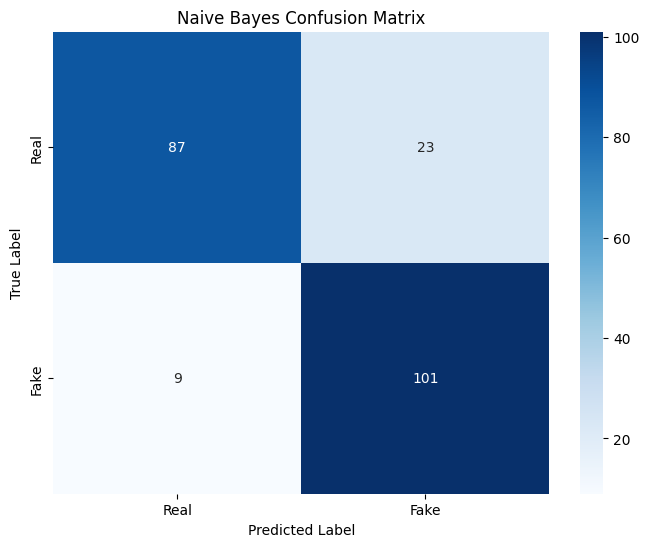

In [9]:
# ==============================================================================
# 5. Generate and Plot the Confusion Matrix
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming y_true and y_pred from the Naive Bayes evaluation are still in memory.
# If you are running this in a new cell, you must re-define these variables
# from your Naive Bayes evaluation script by running the previous cell.

# Define the class labels
class_labels = ['Real', 'Fake']

# Create the confusion matrix
# Ensure the Naive Bayes training and evaluation cell (with classification report) has been run
try:
    cm = confusion_matrix(y_test, y_pred) # Use y_test from the split in Naive Bayes section
    print("Confusion Matrix:")
    print(cm)

    # Plot the confusion matrix for better visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Naive Bayes Confusion Matrix')
    plt.show()
except NameError:
    print("\n❌ Error: 'y_test' or 'y_pred' not defined.")
    print("Please make sure you have run the Naive Bayes training and evaluation cell (the one that prints the classification report) first.")$